# Figure 4: Scatterplot of EOF Loadings / Clusters

In [1]:
# Import Python modules
import os, sys
from pathlib import Path
import numpy as np
import pandas as pd
import xarray as xr
# matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.colors import ListedColormap
from matplotlib import rcParams
# plot styles/formatting
import seaborn as sns

from IPython.display import Image, display

# Path to modules
sys.path.append('../modules')

In [4]:
# Set up paths

path_to_data = '/home/nash/DATA/data/'                            # project data -- read only
path_to_out  = '/home/nash/DATA/repositories/AR_types/out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '/home/nash/DATA/repositories/AR_types/figs/'      # figures


In [5]:
# Set default font for all plots
rcParams['font.family'] = 'sans-serif'   # set the default font family to 'sans-serif'
rcParams['font.sans-serif'] = 'Arial'    # set the default sans-serif font to 'Arial'


## Import Data

In [6]:
## Set variable names (for saving data/figs)
var_names = 'HUV500'
eofmode = 't' # s or t
dispmat = 'cor' # dispersion matrix type correlation/covariance

# Select lat/lon grid
lonmin = 0
lonmax = 120
latmin = 0
latmax =  50

# for figure names for testing different configurations
fname_id = var_names + eofmode + str(lonmin) + str(lonmax) + str(latmin) + str(latmax) + dispmat

# Loadings & AR CAT
df_lst = []
for i, ssn in enumerate(['djf', 'mam']):
    df = pd.read_csv(path_to_out + fname_id + ssn + 'hma_AR-types-loadings.csv')
    # set up datetime index
    df = df.rename(columns={'Unnamed: 0': 'date'})
#     df = df.set_index(pd.to_datetime(df.date))
    df = df.drop(columns=['date', 'LOC'])
    df_lst.append(df)
    
df_lst[0].head()

,EOF1,EOF2,AR_CAT
0,-0.593112,-0.079876,3
1,-0.329284,0.149975,3
2,-0.290704,-0.346866,2
3,-0.255726,-0.170104,3
4,-0.068671,0.240307,3


/home/nash/DATA/repositories/AR_types/figs/kde_plots.png


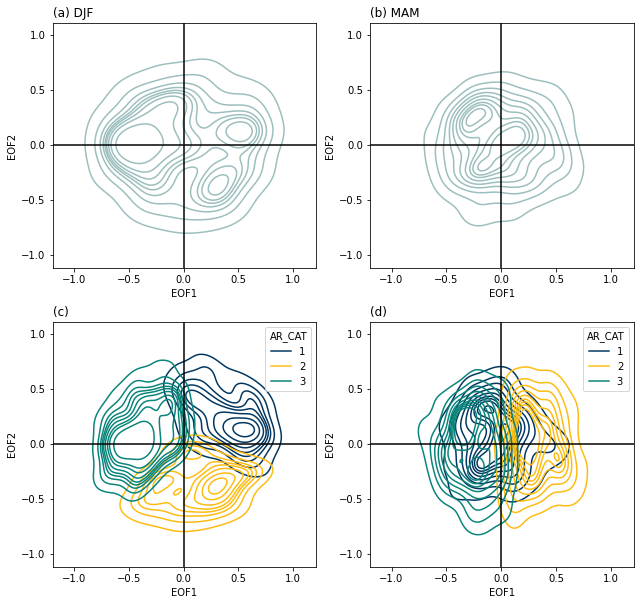

<Figure size 792x720 with 0 Axes>

In [19]:
# Create figure
fig = plt.figure(figsize=(11,10))
fname = path_to_figs + 'kde_plots'
fmt = 'png'
nrows = 2
ncols = 2
plt_lbl1 = ['(a) DJF', '(b) MAM']
plt_lbl2 = ['(c)', '(d)']

# Set custom color palette
colors = ["#9CBEBE", "#047C91"] # mist, aqua
sns.set_palette(sns.color_palette(colors))

# Set up Axes Grid
axgr = AxesGrid(fig, 
                111,
                nrows_ncols=(nrows, ncols), 
                axes_pad = 0.75, 
                cbar_mode=None,
                label_mode='',
                share_all=True)

# Loop for drawing each plot
for k, ax in enumerate(axgr[:2]):
    df = df_lst[k]
    g = sns.kdeplot(data=df, x="EOF1", y="EOF2", fill=False, ax = ax)
    ax.set_title(plt_lbl1[k], loc='left')
    ax.set_xticks(np.arange(-1.0, 1.5, 0.5))
    ax.set_yticks(np.arange(-1.0, 1.5, 0.5))
    ax.axhline(0, color='k')
    ax.axvline(0, color='k')

# Set custom color palette
colors = ["#003660", "#FEBC11", "#09847A"] # navy, gold, sea green
sns.set_palette(sns.color_palette(colors))
    
for k, ax in enumerate(axgr[2:]):
    df = df_lst[k]
    g = sns.kdeplot(data=df, x="EOF1", y="EOF2", hue="AR_CAT",  fill=False, ax = ax, palette=sns.color_palette(colors))
    ax.set_title(plt_lbl2[k], loc='left')
    ax.set_xticks(np.arange(-1.0, 1.5, 0.5))
    ax.set_yticks(np.arange(-1.0, 1.5, 0.5))
    ax.axhline(0, color='k')
    ax.axvline(0, color='k')
    

# Save the figure
fig.savefig('%s.%s' % (fname, fmt), bbox_inches='tight', dpi=fig.dpi)
fig.clf()

plotFile = fname + '.png'
print(plotFile)
display(Image(plotFile))